In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
%matplotlib inline
from sklearn import linear_model
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
from scipy.stats import anderson,shapiro,kstest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#load dataset and display head or first 5 rows
df=pd.read_csv("C:\\Users\\Abilash\\PGA21\\Fish_dataset.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Getting basic information from the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
#perform quick descriptive statistics on the dataset
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# The above describe() function provides descriptive statistics values like mean and standard deviation, quantile(25%,50% and 75%), count of each feature, and minimum and maximum values in each feature.

In [5]:
#checking if there are any missing values:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
#numerical features in the dataset including both independent and dependent

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# visualise the numerical variables
print("Numerical features are:")
df[numerical_features].head()

Number of numerical variables: 6
Numerical features are:


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
#categorical features in the data set
catergorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

for feature in catergorical_features:
    print('The Categorical feature is',feature,"and number of categories in each species are:",len(df[feature].unique()))
    print(df[feature].value_counts())

The Categorical feature is Species and number of categories in each species are: 7
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [8]:
#seperating the dependent and the independent(including both numerical and categorical) features
independent=df.drop('Weight',axis=1)
dependent=df['Weight']

In [9]:
independent.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [10]:
dependent.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [11]:
print("Shape of independent dataframe:",independent.shape)
print("Shape of dependent dataframe:",dependent.shape)

Shape of independent dataframe: (159, 6)
Shape of dependent dataframe: (159,)


In [12]:
numerical_x_y= df.iloc[:,1:] #This consists of all the numerical columns including the dependent and independent features
numerical_x= df.iloc[:,2:] #This consists of all the numerical columns of only independent features
catergorical_x= df.iloc[:,0:] #This consists of all the categorical columns of independent features

In [13]:
numerical_x_y.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
numerical_x.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [15]:
catergorical_x.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Count of Individual Species

In [17]:
print(df['Species'].value_counts())

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


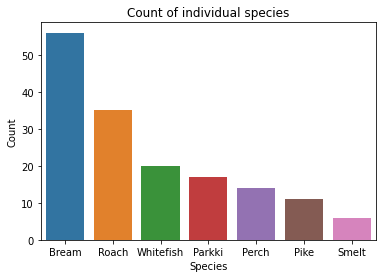

In [19]:
sns.barplot(x=df['Species'].unique(),y=df['Species'].value_counts(),data=df)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Count of individual species")
plt.show()

### We can see from the above plot that the count of Bream species is the most and count of Smelt is the least.

# Identifying outliers 

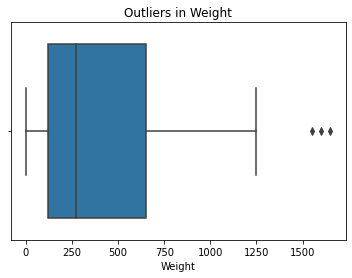

In [20]:
#finding the outliers in dependent feature
sns.boxplot(x=df.Weight,data=df)
plt.title("Outliers in Weight")
plt.show()

### Removing outliers for better model accuracy

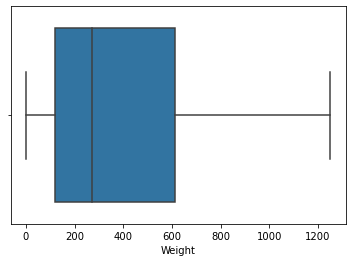

In [22]:
df=df.drop(df.index[df['Weight']>1250],axis=0)
#Checking if the outliers have been removed in dependent variables
sns.boxplot(x='Weight',data=df)
plt.show()

Length1


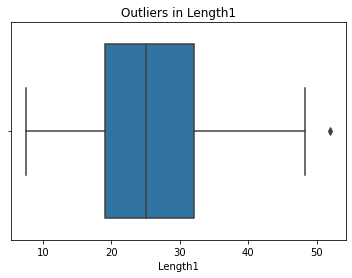

Length2


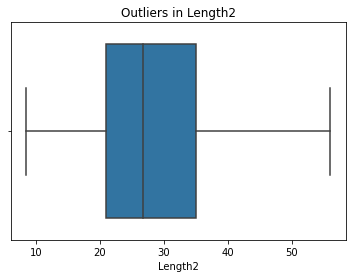

Length3


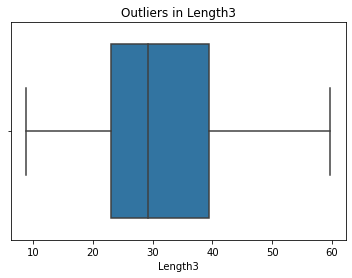

Height


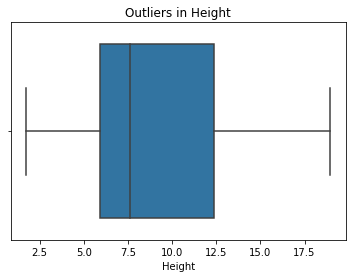

Width


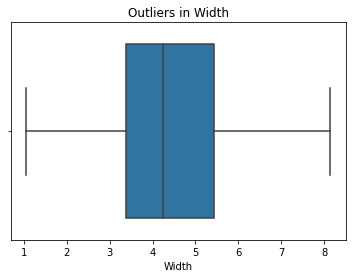

In [23]:
#finding the outliers in independent numerical features
for feature in numerical_x.columns:
        print(feature)
        sns.boxplot(x=df[feature],data=df)
        plt.title('Outliers in {}'.format(feature))
        plt.show()

### There are outliers in Length1, Length2 and Length3 in the independent variables. But we can remove for only the dependent variables.Otherwise a lot of values might get removed and the accuracy of the model may not be correct.

#### All the outliers of the dependent variables have been removed.

# EDA

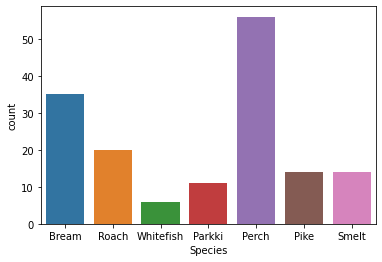

In [26]:
sns.countplot(x=df['Species'],data=df)
plt.show()

### This plot is used to count the number of each category of species.

#### Univariate Analysis:

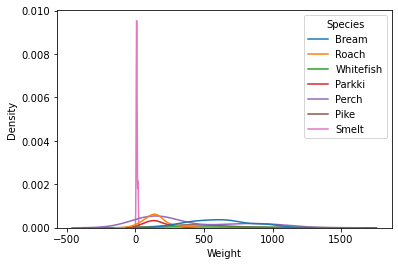

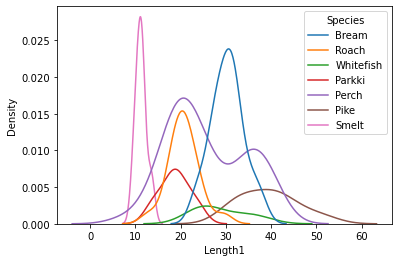

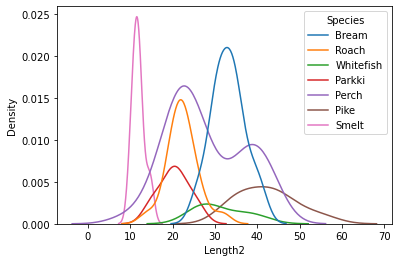

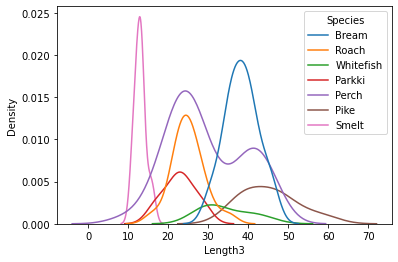

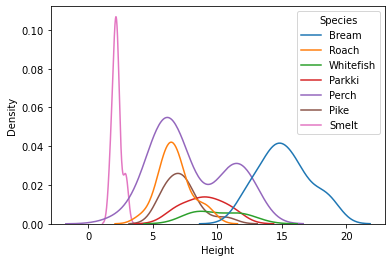

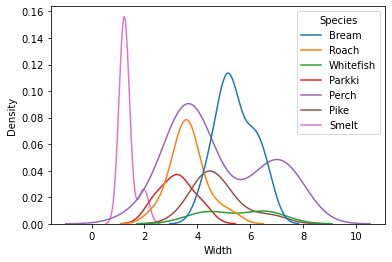

In [28]:
for feature in numerical_x_y.columns:
    sns.kdeplot(numerical_x_y[feature],hue=df.Species)
    plt.show()

#### None of the numerical features are normally distributed. Here we are finding the distribution of each catergory of species with the other numerical features.

#### Bivariate Analysis:

Weight vs Length1


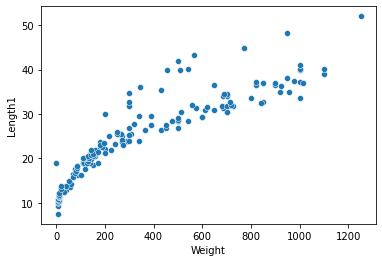

Weight vs Length2


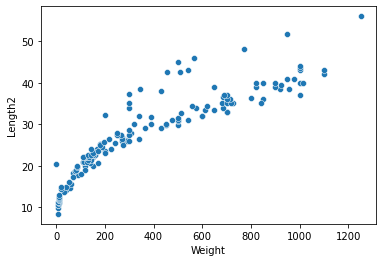

Weight vs Length3


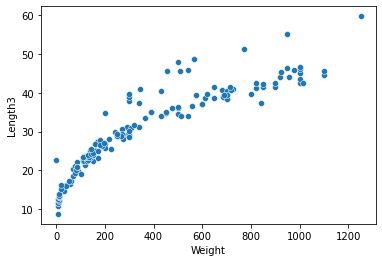

Weight vs Height


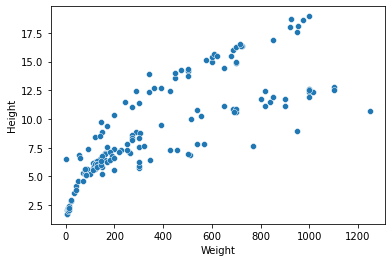

Weight vs Width


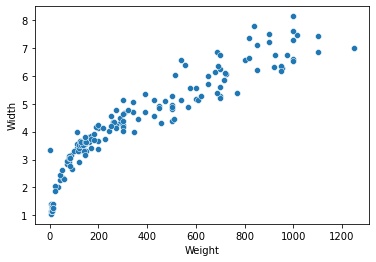

In [30]:
#finding the relationship between the dependent and the independent numerical variables
for feature in numerical_x.columns:
        print("Weight vs",feature)
        sns.scatterplot(data=df,x=df.Weight,y=df[feature])
        plt.show()

#### Multivariate Analysis:

In [31]:
numerical_x_y.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


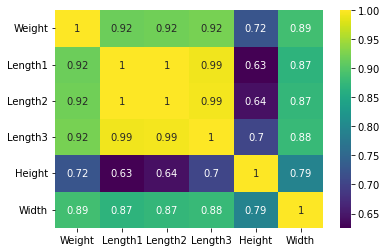

In [32]:
sns.heatmap(data=numerical_x_y.corr(),annot=True,cmap='viridis')
plt.show()

#### Weight has highest correlation with Length1,Length2 and Length3 and least with Height. There is a very strong positive correlation between the independent features: Length1 and Length2.

# Building  regression model

In [33]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [40]:
x=df.drop('Weight',axis=1)
y=df['Weight']

In [38]:
x.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [39]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

#### Checking for Linearity:

Scatter plot for Linearity

Weight vs Length1


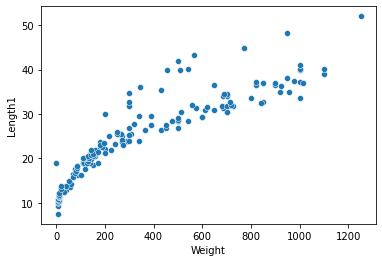

Weight vs Length2


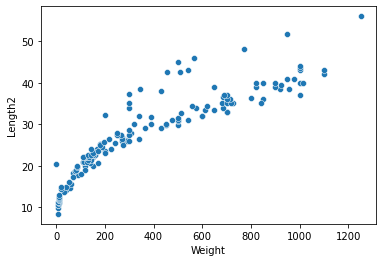

Weight vs Length3


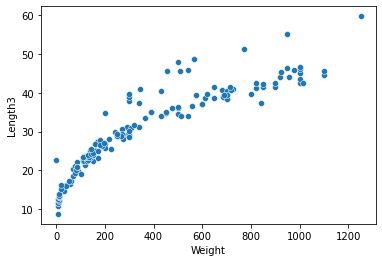

Weight vs Height


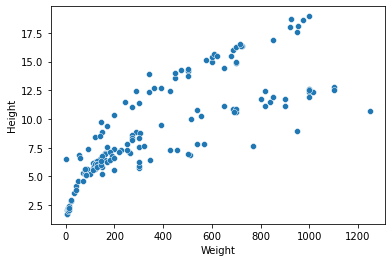

Weight vs Width


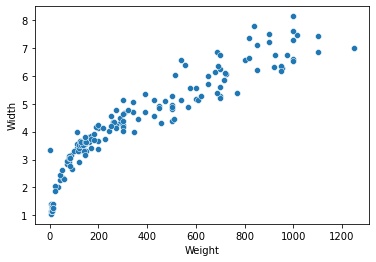

In [42]:
print("Scatter plot for Linearity\n")
for feature in numerical_x.columns:
        print("Weight vs",feature)
        sns.scatterplot(data=df,x=df.Weight,y=df[feature])
        plt.show()

#### To check if the correlation is significant we do Pearsonr.

In [44]:
for i in ['Length1','Length2','Length3','Height','Width']:
    print("\nCorrelation between Weight and",i,":")
    correlation,p_value=0,0
    correlation,p_value=pearsonr(x[i],y)
    print("Correlation = ",correlation,"\nP_value = ",p_value)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")   


Correlation between Weight and Length1 :
Correlation =  0.8957425609788277 
P_value =  4.343723387866899e-56
Significant.

Correlation between Weight and Length2 :
Correlation =  0.899759050950671 
P_value =  2.4714981862120374e-57
Significant.

Correlation between Weight and Length3 :
Correlation =  0.9072921554536855 
P_value =  8.113849316457461e-60
Significant.

Correlation between Weight and Height :
Correlation =  0.8018712156822994 
P_value =  2.867672256971377e-36
Significant.

Correlation between Weight and Width :
Correlation =  0.9234321722602117 
P_value =  6.124586053795755e-66
Significant.


#### Checking for Normality of Dependent Variable:

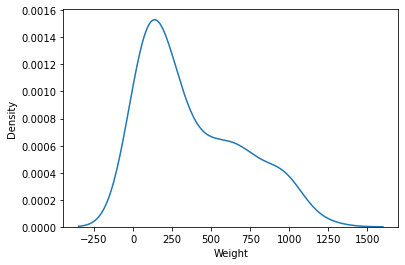

In [46]:
sns.kdeplot(y)
plt.show()

##### Dependent variable is not normally distributed.

##### To check the normality of the dependent variable, we do Shapiro-Wilk test.

In [49]:
#Shapiro-Wilk test
statistic,p=shapiro(y)
print("Statistic = ",statistic,"\nP_value = ",p)
if p>0.05:
    print("Significant.")
else:
    print("Not Significant.")


Statistic =  0.897249698638916 
P_value =  5.5507900498241725e-09
Not Significant.


#### To check the normality of the dependent variable, we do Kolmogorov-Smirnov test.

In [50]:
#KS Test
stats,pv=kstest(y,'norm')
print("Statistic = ",stats,"\nP_value = ",pv)
if p>0.05:
    print("Normally Distributed.") #Normally distribute means significant
else:
    print("Not Normally Distributed.")

Statistic =  0.9935897417722358 
P_value =  0.0
Not Normally Distributed.


### Checking for Multi-collinearity:

In [59]:
vif = pd.DataFrame()
vif['feature'] = numerical_x.columns
vif['VIF'] = [variance_inflation_factor(x.iloc[:,1:].values,i) for i in range(len(x.iloc[:,1:].columns))]

In [60]:
vif

,feature,VIF
0,Length1,11851.606958
1,Length2,15437.668442
2,Length3,3162.484126
3,Height,75.878342
4,Width,96.764212


### There is HUGE multi-collinearity problem, especially between the Lengths. Hence, we will drop those features and build the model.

In [53]:
x1=x.drop(columns=['Length1','Length2','Length3','Species'],axis=1)
x1.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


#### Removing Categorical "Species" feature to build the model

In [61]:
x2=x.drop(columns=['Species'],axis=1)
x2.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.3,random_state=42)

In [65]:
print(xtrain.shape)
print(xtrain.shape)
print(xtest.shape)
print(xtest.shape)

(109, 5)
(109, 5)
(47, 5)
(47, 5)


In [66]:
lm=linear_model.LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [67]:
print("Co-efficient:",lm.coef_)
print("Intercept:",lm.intercept_)

Co-efficient: [120.34509044 -61.17858882 -35.22991173  34.14060743  38.10723795]
Intercept: -405.5596609218128


### Printing regression equation

In [68]:
b0=lm.intercept_
b=list(lm.coef_)

In [69]:
print("Regression equation:\n")
print("Y=",b0,"+ ",end='')
for i in range(len(b)):
    print(b[i],"* ","x"+str(i+1),end='')
    if i != (len(b)-1):
        print("+ ")

Regression equation:

Y= -405.5596609218128 + 120.34509043854823 *  x1+ 
-61.17858881876338 *  x2+ 
-35.22991173178059 *  x3+ 
34.14060743063474 *  x4+ 
38.10723795106997 *  x5

In [70]:
train_pred=lm.predict(xtrain)
train_pred

array([ 165.95979286,  550.60481006,  774.09029118,  248.01238841,
        845.81064141,  652.13917788,  862.6640129 ,  751.52086859,
        146.67573038,  432.07743958,  835.95555704,  163.37927197,
        747.63504435,  225.15331086,  593.48711619, -104.57336784,
        521.82946907,  642.50326318, -109.0662112 ,  322.10382347,
        739.62301138,  185.40465105,  221.18111841,  100.45689288,
        686.59088692,  172.38147909,  373.29448038,  628.47128687,
        611.55682314,  632.25053584,  175.60411009,  137.67738124,
       -144.46328711, -115.57694909, -167.09870629,  239.76309738,
        712.24039531,   60.91455926,  -60.64034659,  863.31647376,
       -141.62124135, -122.13337586,   66.84391478,  -50.49852625,
        219.59692597,  347.63583849,  432.37054062,  433.24468454,
        891.04576888,  244.28225214,  -58.43552385,   95.82528896,
         71.27481002,  865.47989307,  214.74874143,  458.84470214,
        174.61138023,  382.94261947,  753.51298506,  177.50659

In [71]:
train_rmse=np.sqrt(mean_squared_error(ytrain,train_pred))
train_rmse

98.92707429620268

In [72]:
errors=ytrain-train_pred
errors.head()

86     -45.959793
11     -50.604810
60     225.909709
67     -78.012388
124    154.189359
Name: Weight, dtype: float64

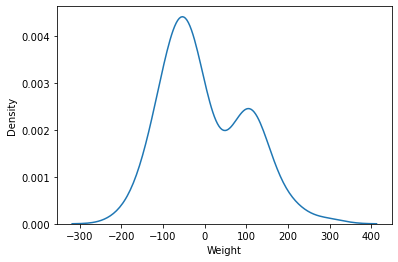

In [73]:
sns.kdeplot(errors)
plt.show()

In [74]:
r2_score(ytrain,train_pred)

0.9014288885350767

In [75]:
test_pred=lm.predict(xtest)
test_pred

array([ 266.2441448 ,  322.53856418,  133.39031697,   36.3269938 ,
        703.31973506,  760.42442995,  167.78646271,  538.37605205,
        185.84101898,  712.62102305,  624.66517314,  168.29018829,
        604.01952463,  896.4448434 ,  632.82857816,  753.61012439,
        775.86028283,  398.03373599, -100.42065151,   85.26595311,
        274.85190861,  633.10136951,  523.18799714,  545.46373672,
        758.19620467,  356.59077853,  265.60756855,  280.81894787,
        300.75719793,  238.79000545,  179.38530728, -124.53525382,
        281.27550541,  715.04232094,  845.88642893,  321.45339972,
        922.88193748,  214.28565139,  143.72865253,  664.57307793,
        618.45510617,   98.98282264,  466.21090736,   39.93118033,
         59.63940796,  607.18631196,  608.12276776])

In [76]:
test_rmse=np.sqrt(mean_squared_error(ytest,test_pred))
test_rmse

104.87626435528452

In [77]:
errors1=ytest-test_pred
errors1.head()

96     -41.244145
69    -122.538564
82     -23.390317
76      33.673006
114     -3.319735
Name: Weight, dtype: float64

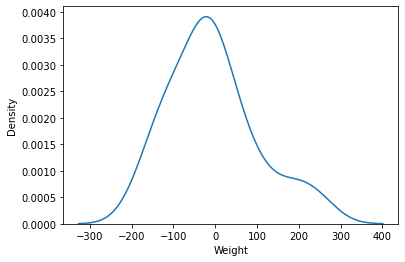

In [78]:
sns.kdeplot(errors1)
plt.show()

### The errors are not normally distributed.

In [79]:
r2_score(ytest,test_pred)

0.895213543861235

In [80]:
print("Train rmse:",train_rmse)
print("Test rmse:",test_rmse)

Train rmse: 98.92707429620268
Test rmse: 104.87626435528452


## Train_rmse is less than Test_rmse, therefore there is an overfitting problem.

In [82]:
xtrain1=sm.add_constant(xtrain) #adding constant in the training values to get the beta-0 value.
xtrain1.head()

C:\Users\Abilash\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Length1,Length2,Length3,Height,Width
86,1.0,20.0,22.0,23.5,6.1100,3.4075
11,1.0,28.7,31.0,36.2,14.3714,4.8146
60,1.0,37.3,40.0,43.5,12.3540,6.5250
67,1.0,19.0,20.7,23.2,9.3960,3.4104
124,1.0,39.8,43.0,45.2,11.9328,7.2772


In [84]:
model=sm.OLS(ytrain,xtrain1).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.73e-50
Time:                        22:35:21   Log-Likelihood:                -655.45
No. Observations:                 109   AIC:                             1323.
Df Residuals:                     103   BIC:                             1339.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -405.5597     29.397    -13.796      0.000    -463.862    -347.258
Length1      120.3451     41.341      2.911      0.004      38.355     202.336
Length2      -61.1786     41.913     -1.460      0.147    -144.304      21.947
Length3      -35.2299     16.421     -2.145      0.034     -67.797      -2.662
Height        34.1406      8.634      3.954      0.000      17.017      51.264
Width         38.1072     20.941      1.820      0.072      -3.424      79.639
==============================================================================
Omnibus:                        5.802   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.815
Skew:                           0.528   Prob(JB):                       0.0546
Kurtosis:                       2.595   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparing real and predicted weights

In [86]:
data = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred, 'Errors': errors1})
data

,Actual,Predicted,Errors
96,225.0,266.244145,-41.244145
69,200.0,322.538564,-122.538564
82,110.0,133.390317,-23.390317
76,70.0,36.326994,33.673006
114,700.0,703.319735,-3.319735
29,1000.0,760.424430,239.575570
94,150.0,167.786463,-17.786463
132,430.0,538.376052,-108.376052
93,145.0,185.841019,-40.841019
139,770.0,712.621023,57.378977


# This model has 90% accuracy.